In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
data =pd.read_csv("creditcard.csv")

In [46]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [47]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

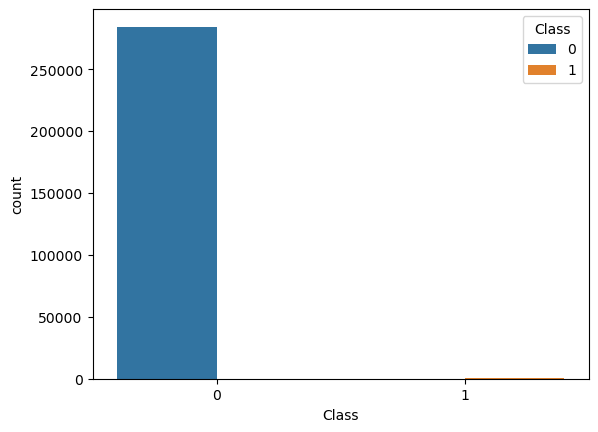

In [48]:
sn.countplot(data=data,x=data["Class"],hue="Class")
plt.show()

In [49]:
# Creating fraudulent dataframe
data_fraud = data[data['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = data[data['Class'] == 0]

C:\Users\10713310\AppData\Local\Temp\ipykernel_1960\4150469219.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sn.distplot(data_fraud['Time'],label='fraudulent',hist=False)
C:\Users\10713310\AppData\Local\Temp\ipykernel_1960\4150469219.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sn

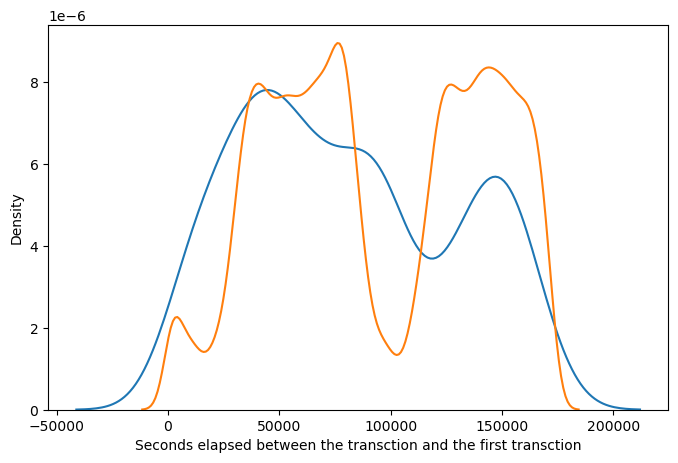

In [50]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sn.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sn.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

In [51]:
data.duplicated().sum()

1081

In [52]:
data.drop_duplicates(inplace=True)

In [53]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

<Axes: >

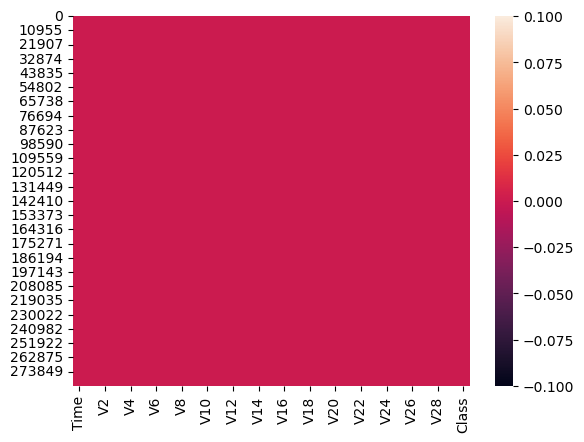

In [55]:
sn.heatmap(data.isnull())

In [56]:
X= data.drop(columns="Class")
Y= data["Class"]

In [57]:
# Standardize 'Amount' column
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

In [58]:
# Train-test split before SMOTE (to prevent data leakage)
XTR,XTS,YTR,YTS =train_test_split(X,Y,test_size=0.2,random_state=42)

In [71]:
# Apply SMOTE to balance classes
X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
# Check new class distribution
print(pd.Series(Y_resampled).value_counts())

Class
0    283253
1    283253
Name: count, dtype: int64


In [70]:
Y_resampled.value_counts()

Class
0    283253
1    283253
Name: count, dtype: int64

In [40]:
# n_estimators -Controls the number of treee in the forest (more tree = better generalization but hiher computation cost)
# random_state - ensures reproducibity by the controlling proccessing like data splitting and tree building
# class_weight - help handle inbanlanced dataset by adusting the importance of the different claass during training

RMC_Model = RandomForestClassifier(n_estimators=100,random_state=42,class_weight='balanced')

In [59]:
RMC_Model.fit(X_resampled,Y_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [60]:
PR=RMC_Model.predict(X_resampled)

In [65]:
RMC_Model.score(X_resampled,Y_resampled)

1.0

In [ ]:
# Model Evaluation

In [66]:
classification_report(Y_resampled,PR)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00    283253\n           1       1.00      1.00      1.00    283253\n\n    accuracy                           1.00    566506\n   macro avg       1.00      1.00      1.00    566506\nweighted avg       1.00      1.00      1.00    566506\n'

In [68]:
confusion_matrix(Y_resampled,PR)

array([[283253,      0],
       [     0, 283253]], dtype=int64)

In [69]:
# system making
input =(4462,-2.30334956758553,1.759247460267,-0.359744743330052,2.33024305053917,-0.821628328375422,-0.0757875706194599,0.562319782266954,-0.399146578487216,-0.238253367661746,-1.52541162656194,2.03291215755072,-6.56012429505962,0.0229373234890961,-1.47010153611197,-0.698826068579047,-2.28219382856251,-4.78183085597533,-2.61566494476124,-1.33444106667307,-0.430021867171611,-0.294166317554753,-0.932391057274991,0.172726295799422,-0.0873295379700724,-0.156114264651172,-0.542627889040196,0.0395659889264757,-0.153028796529788,239.93)
inputV = np.asarray(input).reshape(1,-1)
syPred = RMC_Model.predict(inputV)
print(syPred)
if syPred ==0:
    print("True")
else:
    print("False")
    

[1]
False


C:\Users\10713310\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
